# Implementation of FastICA

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy import signal
from astropy.io import fits
from sklearn.decomposition import FastICA


In [2]:
in_path_fg = "./FastICA_Data/"
in_path_cs = "./FastICA_Data/"

output_path = "./FastICA_Data/"
fname_all = "test_filename"


fname_foreground = "foregrounds_total"

fname_cs = "observer_lightcone"

ncomp = 4

indata_fg = fits.getdata(in_path_fg+fname_foreground+'.fits')
indata_cs = fits.getdata(in_path_cs+fname_cs+'.fits')
indata_cs = indata_cs/1000 # 21cmFAST are in K by default????

indata_fg = indata_fg.transpose(2, 0, 1)

indata_cs = indata_cs.transpose(2, 0, 1)
for i in range(indata_cs.shape[0]):
    indata_cs[i,:,:] -= np.mean(indata_cs[i,:,:])
    

sh = indata_fg.shape
print(sh)


(316, 150, 150)


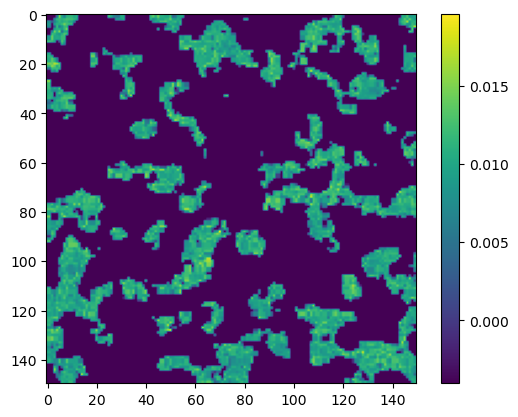

In [3]:
indata = indata_fg+indata_cs

plt.imshow(indata_cs[0,:,:])
plt.colorbar()

In [4]:
indata = indata_fg+indata_cs


sh = indata.shape
print(sh)
X = np.reshape(indata,(sh[0], sh[1]*sh[2]))

ica1 = FastICA(n_components=ncomp)
model1 = []
S = ica1.fit_transform(X.T)  # Reconstruct signals
A = ica1.mixing_  # Get estimated mixing matrix

model1 = np.reshape(np.matmul(A,S.T),(sh[0], sh[1],sh[2]))

res =  indata-model1


rec =  indata-res


(316, 150, 150)


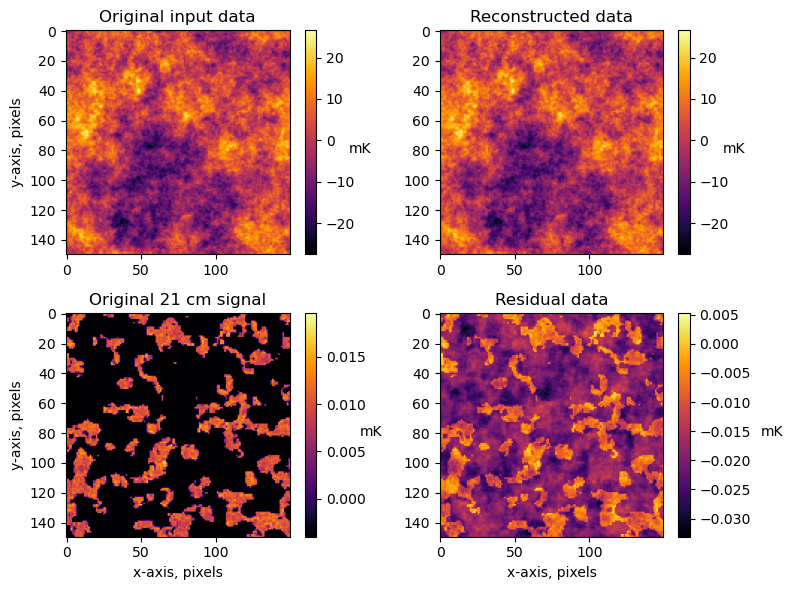

In [5]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.imshow(indata[0], cmap='inferno')
plt.title('Original input data')
cbar = plt.colorbar()
cbar.set_label('mK', rotation=0)
plt.ylabel('y-axis, pixels')

plt.subplot(222)
plt.imshow(rec[0], cmap='inferno')
plt.title('Reconstructed data')
cbar = plt.colorbar()
cbar.set_label('mK', rotation=0)

plt.subplot(223)
plt.imshow(indata_cs[0], cmap='inferno')
plt.title('Original 21 cm signal')
cbar = plt.colorbar()
cbar.set_label('mK', rotation=0)
plt.xlabel('x-axis, pixels')
plt.ylabel('y-axis, pixels')

plt.subplot(224)
plt.imshow(res[0], cmap='inferno')
plt.title('Residual data')
cbar = plt.colorbar()
cbar.set_label('mK', rotation=0, labelpad=15)
plt.xlabel('x-axis, pixels')

plt.tight_layout()

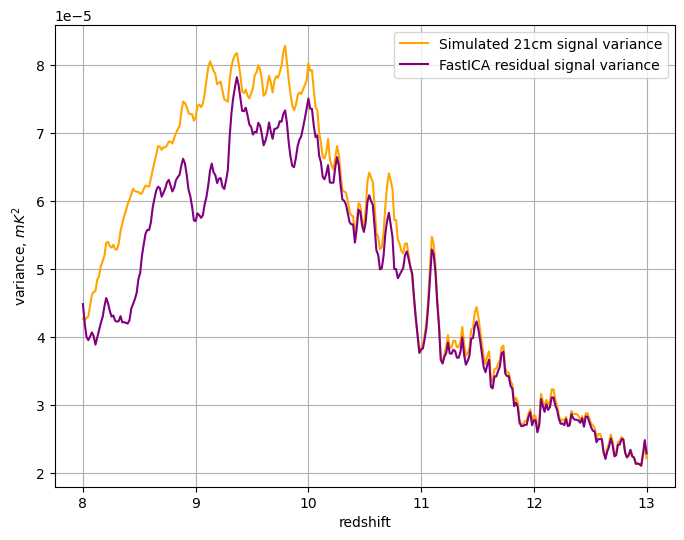

In [6]:
var_21 = []
var_res = []
for i in range(indata.shape[0]):
    var_21.append(np.var(indata_cs[i,:,:]))
    var_res.append(np.var(res[i,:,:]))

#difference
diff = np.array(var_21) - np.array(var_res)

x = np.linspace(8,13,316)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x, var_21, 'orange', label='Simulated 21cm signal variance')
ax.plot(x, var_res, 'purple', label='FastICA residual signal variance')
ax.set_xlabel('redshift')
ax.set_ylabel(r'variance, $mK^2$')
plt.legend()
plt.grid()
